In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
table=pd.read_csv("Fertility rate - Sheet1.csv")
replace_char=["-", "_"]

# Pierwsze wiersze tabeli

In [16]:
print(table.head())


                         regions  2011  2012  2013  2015  2017  2019  2021
0  Autonomous Republic of Crimea  1.56  1.68  1.66     _     _     _     _
1               Vinnytsia region  1.53  1.59  1.53   1.5  1.36   1.2  1.14
2                   Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
3          Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
4                 Donetsk region  1.27  1.34  1.32     _     _     _     _


# Liczba wierszy i kolumn

In [18]:
shape = table.shape
print(f'Liczba wierszy: {shape[0]}, Liczba kolumn: {shape[1]}')

Liczba wierszy: 27, Liczba kolumn: 8


# Zastąp wartość "—" w tabeli wartością NaN

In [23]:
table.replace(replace_char, np.nan, inplace=True)
print(table)

                          regions  2011  2012  2013  2015  2017  2019  2021
0   Autonomous Republic of Crimea  1.56  1.68  1.66   NaN   NaN   NaN   NaN
1                Vinnytsia region  1.53  1.59  1.53   1.5  1.36   1.2  1.14
2                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
3           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
4                  Donetsk region  1.27  1.34  1.32   NaN   NaN   NaN   NaN
5                  Fatigue region  1.65  1.71  1.68   1.6  1.42  1.23  1.14
6          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52   NaN
7               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09   NaN
8          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15
9                     Kyiv region  1.58  1.67  1.64  1.65  1.41  2.15  1.07
10              Kirovohrad region   NaN  1.61  1.57  1.49   1.3  1.12  1.04
11                 Luhansk region  1.27  1.33  1.30   NaN   NaN   NaN   NaN
12          

# Zdefiniowanie typów kolumn

In [25]:
print(table.dtypes)


regions     object
2011        object
2012       float64
2013       float64
2015        object
2017        object
2019        object
2021        object
dtype: object


# Zmiana typów kolumn nienumerycznych na numeryczne

In [33]:
for col in table.columns[1:]:
    table[col] = pd.to_numeric(table[col], errors='coerce')
print(table.dtypes)


regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019       float64
2021       float64
dtype: object


# Proporcja pustych miejsc w każdej kolumnie

In [32]:
null_proportion = table.isnull().sum() / len(table)
print(null_proportion)

regions    0.000000
2011       0.037037
2012       0.000000
2013       0.000000
2015       0.148148
2017       0.148148
2019       0.148148
2021       0.407407
dtype: float64


# Usunięcie danych dla całego kraju (ostatni wiersz tabeli)


In [42]:
table = table[:-1]


# Zastąpienie brakujących danych średnimi wartościami tych kolumn


In [41]:
mean_value = table[col].mean()
table.fillna({col: mean_value}, inplace=True)
print(table)

                          regions  2011  2012  2013  2015  2017  2019     2021
0   Autonomous Republic of Crimea  1.56  1.68  1.66   NaN   NaN   NaN  1.15625
1                Vinnytsia region  1.53  1.59  1.53  1.50  1.36  1.20  1.14000
2                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45000
3           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03000
4                  Donetsk region  1.27  1.34  1.32   NaN   NaN   NaN  1.15625
5                  Fatigue region  1.65  1.71  1.68  1.60  1.42  1.23  1.14000
6          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52  1.15625
7               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09  1.15625
8          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15000
9                     Kyiv region  1.58  1.67  1.64  1.65  1.41  2.15  1.07000
10              Kirovohrad region   NaN  1.61  1.57  1.49  1.30  1.12  1.04000
11                 Luhansk region  1.27  1.33  1.30 

# Lista regionów, w których wskaźnik urodzeń w 2019 r. był wyższy niż średnia dla Ukrainy


In [43]:
mean_2019 = table['2019'].mean()
regions_above_mean_2019 = table[table['2019'] > mean_2019]['regions'].tolist()
print(regions_above_mean_2019)

['Volyn region', 'Transcarpathian region', 'Ivano-Frankivsk region', 'Kyiv region', 'Lviv region', 'Odessa region', 'Rivne region', 'Kherson region', 'Khmelnytsky region', 'Chernivtsi region']


# Region z najwyższym wskaźnikiem urodzeń w 2015 roku 


In [44]:
highest_birth_rate_2015 = table.loc[table['2015'].idxmax()]['regions']
print(highest_birth_rate_2015)

Rivne region


# Wykres słupkowy wskaźnika urodzeń według regionów w 2019 r.


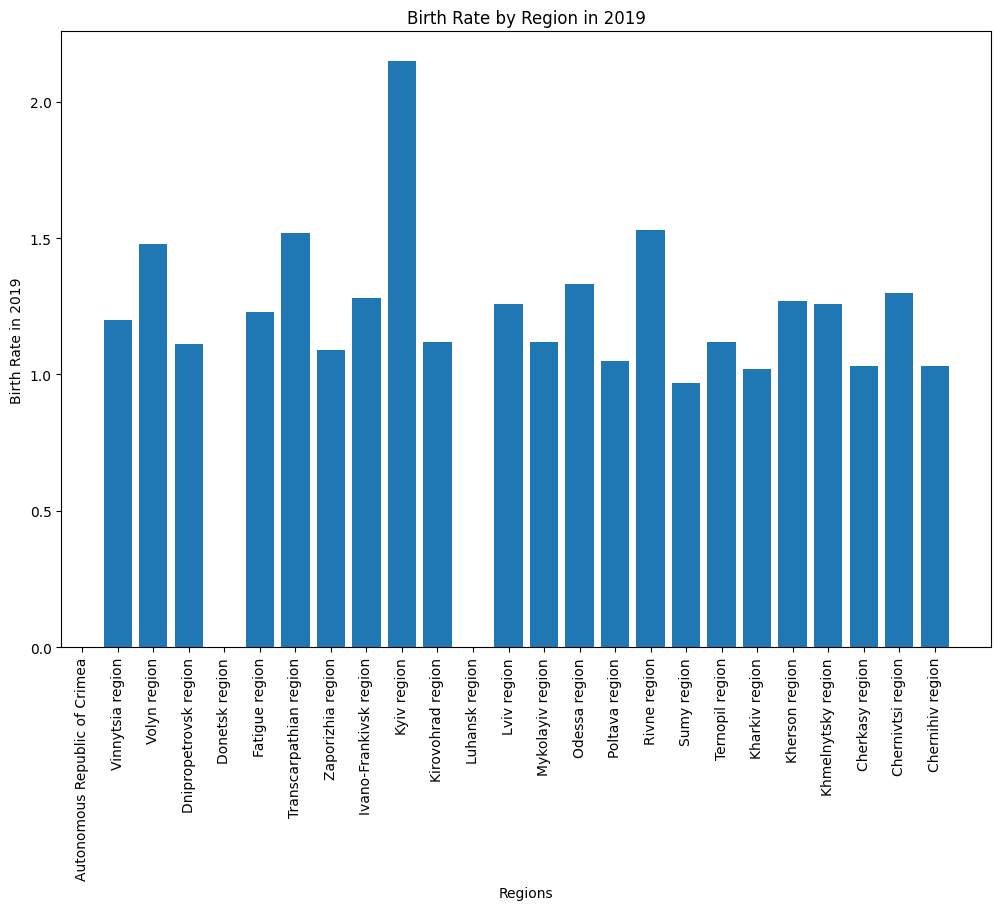

In [47]:
plt.figure(figsize=(12, 8))
plt.bar(table['regions'], table['2019'])
plt.xlabel('Regions')
plt.ylabel('Birth Rate in 2019')
plt.title('Birth Rate by Region in 2019')
plt.xticks(rotation=90)
plt.show()

# Wykres liniowy


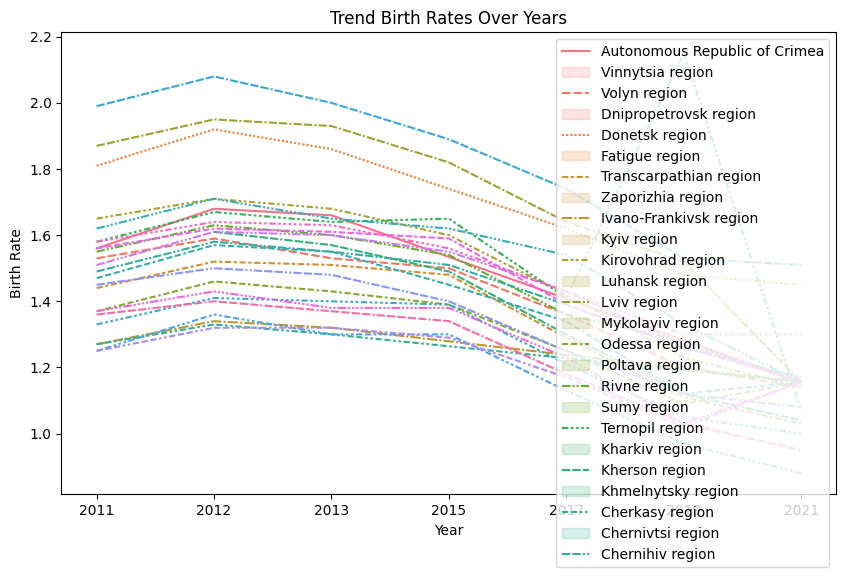

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=table.set_index('regions').T)
plt.title('Trend Birth Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.legend(table['regions'])
plt.show()

# Wykres punktowy


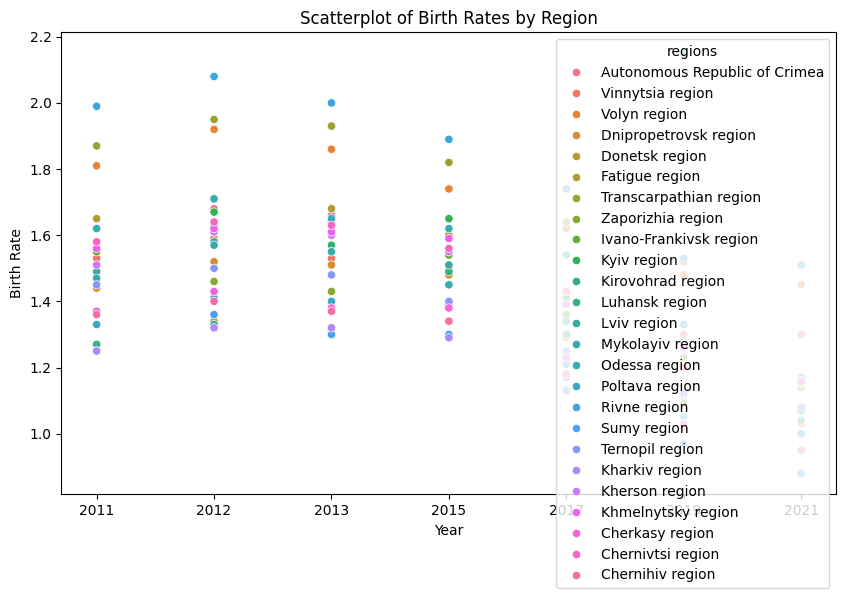

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=table.melt(id_vars='regions', var_name='Year', value_name='Birth Rate'), x='Year', y='Birth Rate', hue='regions')
plt.title('Scatterplot of Birth Rates by Region')
plt.show()

# Wykres pudełkowy


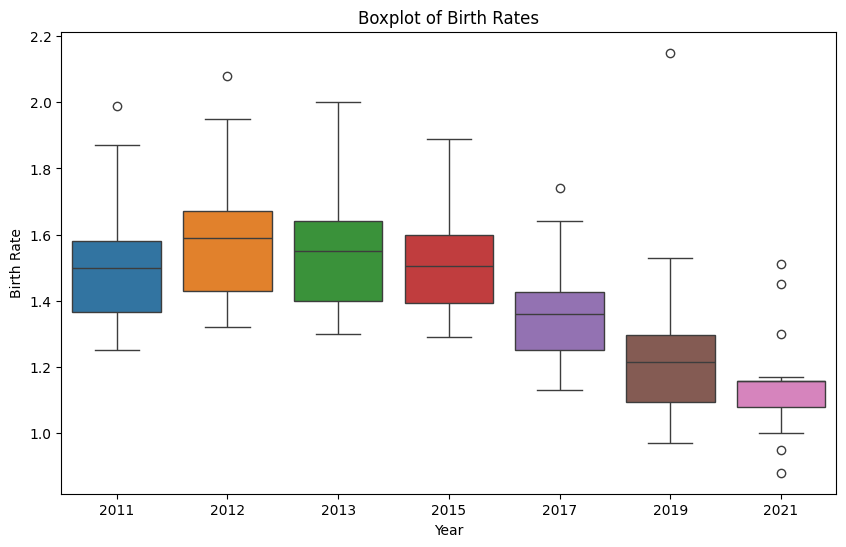

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=table.drop(columns=['regions']))
plt.title('Boxplot of Birth Rates')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.show()